In [2]:
import matplotlib.pyplot as plt
import numpy as np

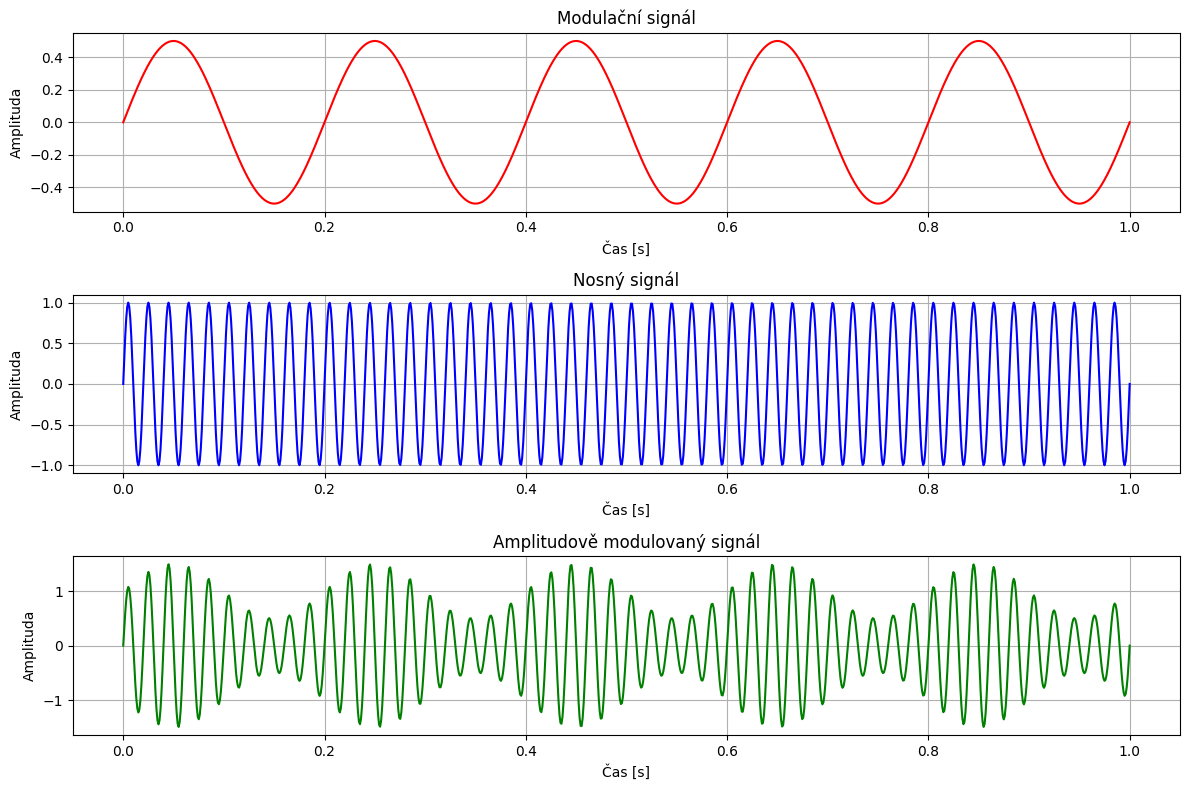

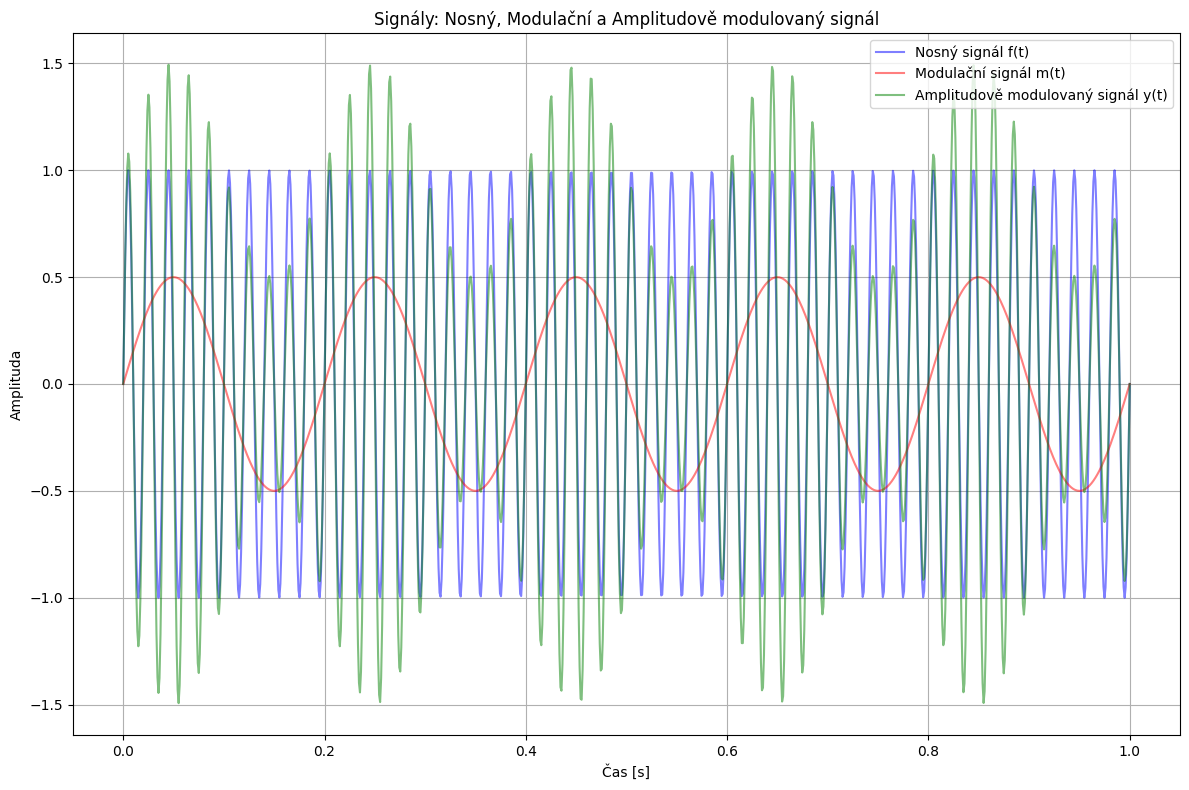

In [27]:
A0 = 1  # Amplituda nosného signálu
M = 0.5  # Amplituda modulačního signálu
f_nosny = 50  # Frekvence nosného signálu
f = 5  # Frekvence modulačního signálu
t = np.linspace(0, 1, 1000)  # Časový vektor (1 sekunda, 1000 bodů)

# Nosný signál f(t) = A0 * sin(ωt)
signal = A0 * np.sin(2 * np.pi * f_nosny * t)

# Modulační signál m(t) = M * sin(φt)
signal = M * np.sin(2 * np.pi * f * t)

# Amplitudová modulace y(t) = (A0 + M * sin(φt)) * sin(ωt)
modulovany_signal = (A0 + signal) * np.sin(2 * np.pi * f_nosny * t)

# Vykreslení signálů
plt.figure(figsize=(12, 8))

# Vykreslení modulačního signálu
plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Modulační signál (m(t))", color="r")
plt.title("Modulační signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

# Vykreslení nosného signálu
plt.subplot(3, 1, 2)
plt.plot(t, signal, label="Nosný signál (f(t))", color="b")
plt.title("Nosný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

# Vykreslení modulovaného signálu
plt.subplot(3, 1, 3)
plt.plot(t, modulovany_signal, label="Amplitudově modulovaný signál (y(t))", color="g")
plt.title("Amplitudově modulovaný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.tight_layout()

# Vykreslení všech signálů
plt.figure(figsize=(12, 8))
plt.plot(t, signal, label="Nosný signál f(t)", color="b", alpha=0.5)
plt.plot(t, signal, label="Modulační signál m(t)", color="r", alpha=0.5)
plt.plot(
    t,
    modulovany_signal,
    label="Amplitudově modulovaný signál y(t)",
    color="g",
    alpha=0.5,
)
plt.title("Signály: Nosný, Modulační a Amplitudově modulovaný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
def nosna_vlna(A0, f, tvec):
    x = A0 * np.sin(2 * np.pi * f * tvec)
    return np.array(x)


def modulacni_vlna(M, phi, tvec):
    m = M * np.sin(2 * np.pi * phi * tvec)
    return np.array(m)


numT = 10

f = 2
A0 = 1
T = 1 / f
Tmax = numT * T
n_length = 5000
tvecx = np.linspace(0, Tmax, n_length)

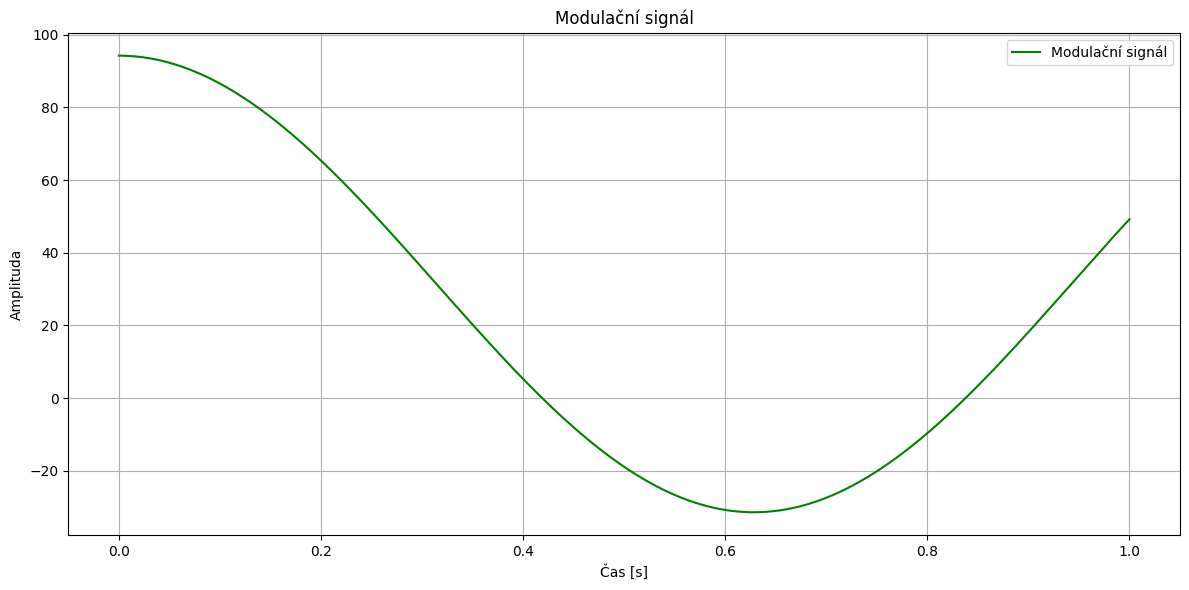

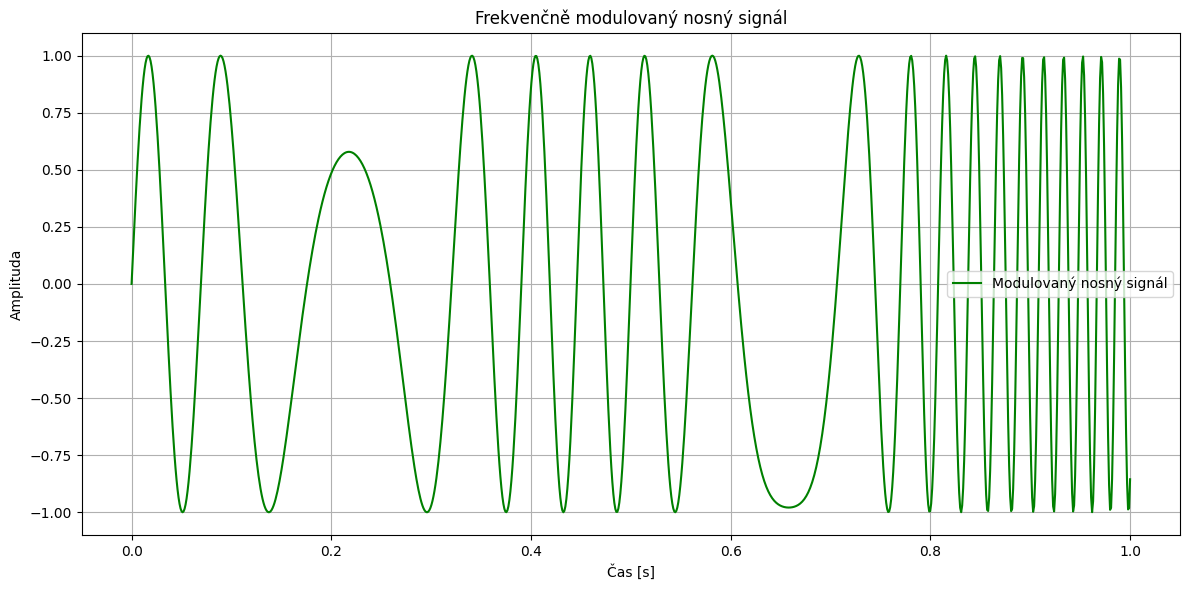

In [19]:
# Frekvenční modulace (FM)
# - v klasickém pojetí je ω konstantní
# - zde je ω dána rovnicí
# - zachovává amplitudu, ale měníme frekvenci

# Amplitodová modulace
# - mění amplitudu, ale respektuje frekvenci

A0 = 1  # Amplituda nosného signálu
M = 0.5  # Amplituda modulačního signálu
f_nosny = 50  # Frekvence nosného signálu
f_modulacni = 5  # Frekvence modulačního signálu
t = np.linspace(0, 1, 1000)  # Časový vektor (1 sekunda, 1000 bodů)


# Modulační signál ω(t) = ω + Δω * cos(φt)
def modulacni_signal(f, t):
    omega = 2 * np.pi * f
    signal = omega + (2 * np.pi * 10) * np.cos(f * t)
    return signal


# Modulovaný nosný signál f(t) = A0 * sin(ω(t)t)
def modulovany_nosny_signal(A0, modulacni_signal, t):
    signal = A0 * np.sin(modulacni_signal * t)
    return signal


signal_modulacni = modulacni_signal(f_modulacni, t)
signal_modulovany_nosny = modulovany_nosny_signal(A0, signal_modulacni, t)

plt.figure(figsize=(12, 6))
plt.plot(t, signal_modulacni, label="Modulační signál", color="g")
plt.title("Modulační signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t, signal_modulovany_nosny, label="Modulovaný nosný signál", color="g")
plt.title("Frekvenčně modulovaný nosný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
# Konvoluce
# - konvoluční jádro (kernel), které se posouvá po signálu
# - počítám, jaký je průnik/obsah těch dvou křivek

# Jak vygeneruju pomocí sin a cos obdelníkový a pilový signál? možná lze zjistit z interní reprezentace funkce sawtooth?

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

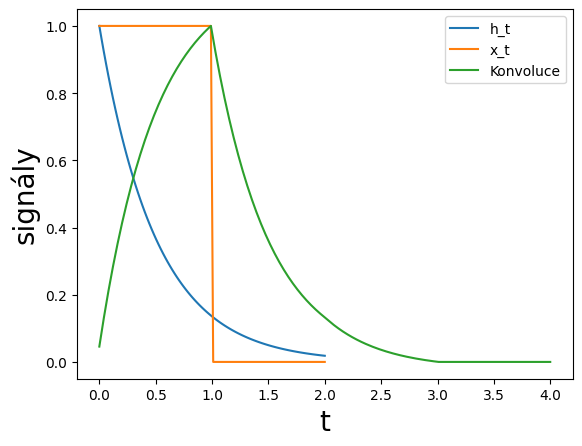

In [13]:
def kernel(alpha, tvec, a):
    h_t = alpha * np.exp(-a * tvec)
    return np.array(h_t)


n_length = 100
tvec = np.linspace(0, 2, n_length, endpoint=True)
h_t = kernel(1.0, tvec, 2.0)  # Konvoluční jádro

x_t = signal.square(2 * np.pi * 0.5 * tvec)  # Funkce
x_t = np.where(tvec >= 1.0, 0, x_t)  # Odstranění peaku

plt.plot(tvec, h_t, label="h_t")
plt.plot(tvec, x_t, label="x_t")

# Konvoluce
Conv = np.convolve(x_t, h_t, mode="full")

# Přeškálování funkce
Conv = Conv / np.max(Conv)

t_Conv = np.linspace(0, 4, np.max(Conv.shape))

plt.plot(t_Conv, Conv, label="Konvoluce")
plt.xlabel("t", fontsize=20)
plt.ylabel("signály", fontsize=20)
plt.legend(loc="upper right")

plt.show()

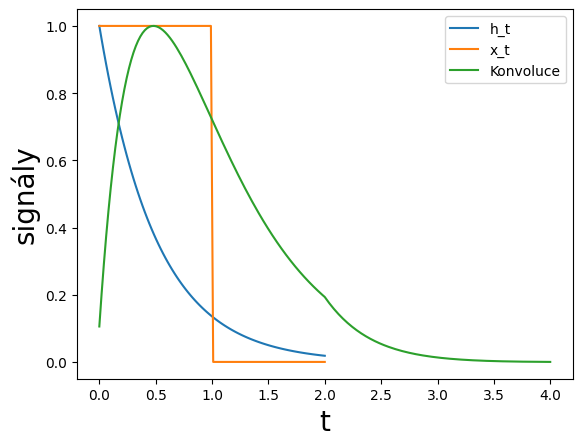

In [14]:
def kernel(alpha, tvec, a):
    h_t = alpha * np.exp(-a * tvec)
    return np.array(h_t)


n_length = 100
tvec = np.linspace(0, 2, n_length, endpoint=True)
h_t = kernel(1.0, tvec, 2.0)  # Konvoluční jádro

x_t = signal.square(2 * np.pi * 0.5 * tvec)  # Funkce
x_t = np.where(tvec >= 1.0, 0, x_t)  # Odstranění peaku

plt.plot(tvec, h_t, label="h_t")
plt.plot(tvec, x_t, label="x_t")

# Konvoluce (ZDE JSEM DAL STEJNOU FUNKCI)
Conv = np.convolve(h_t, h_t, mode="full")

# Přeškálování funkce
Conv = Conv / np.max(Conv)

t_Conv = np.linspace(0, 4, np.max(Conv.shape))

plt.plot(t_Conv, Conv, label="Konvoluce")
plt.xlabel("t", fontsize=20)
plt.ylabel("signály", fontsize=20)
plt.legend(loc="upper right")

plt.show()

(-2.0, 2.0)

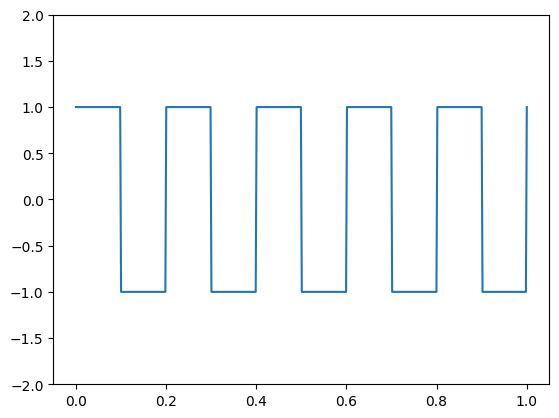

In [3]:
t = np.linspace(0, 1, 500, endpoint=True)
x_t = signal.square(2 * np.pi * 5 * t)
plt.plot(t, x_t)
plt.ylim(-2, 2)

(-2.0, 2.0)

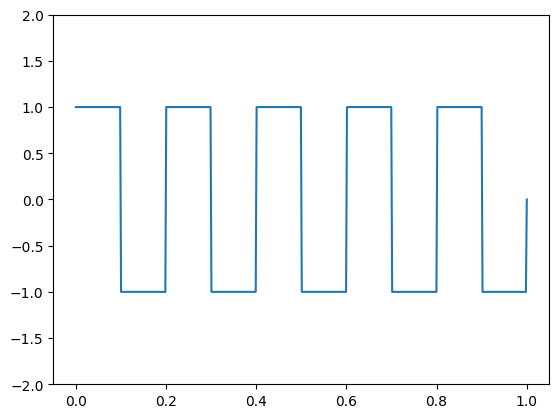

In [4]:
t = np.linspace(0, 1, 500, endpoint=True)
x_t = signal.square(2 * np.pi * 5 * t)
x_t = np.where(t >= 1.0, 0, x_t)
plt.plot(t, x_t)
plt.ylim(-2, 2)